# Dự đoán chất lượng rượu vang dựa trên các thành phần lý hóa của rượu vang đỏ



## 1. Thu thập dữ liệu (Data Collection)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Dữ liệu gồm có hai tập *datasets* về các mẫu rượu vang đỏ và trắng thu thập ở phía bắc của Bồ Đào Nha nhằm mô hình hóa chất lượng của rượu vang dựa trên các kiểm nghiệm hóa lý. Tập dữ liệu nghiêm cứu được lấy từ [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) có thể tải về [tại đây](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/).

In [13]:
wine_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_dat = read.csv(
    wine_path
    ,header=T
    ,sep = ';'
)
head(wine_dat)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### 1.1. Mô tả dữ liệu

<div align="justify">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hai bộ dữ liệu trên liên quan đến các biến thể về rượu vang trắng và đỏ ở Bồ Đào Nha, tập dữ liệu về rượu vang trắng gồm có 4898 bản ghi (individuals) và rượu vang đỏ có 1599 bản ghi (individuals). Trong đó, dữ liệu phân tích gồm có 12 biến dữ liệu, trong đó có 11 biến là các thông số thành phần hóa lý và 1 biến đánh giá chất lượng. Trong bài nghiên cứu này người thực hiện chỉ sử dụng tập dữ liệu rượu vang đỏ để phân tích và dự đoán chất lượng rượu.</div>

### 1.2. Đặt vấn đề

<div align="justify">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bài toán được đặt ra trong nghiên cứu này liệu có thể tiên lượng được chất lượng của loại rượu dựa trên các thành phần hóa lý của nó hay không?</div>

## 2. Trình bày dữ liệu

Dữ liệu trong tập dữ liệu trên gồm 12 biến như sau:

- **fixed.acidity**: thông số đo độ chua cố định
- **volatile.acidity**: mức độ bay hơi của rượu
- **citric.acid**: nồng độ Axit Citric
- **residual.sugar**: lượng đường
- **chlorides**: nồng độ Clo
- **free.sulfur.dioxide**: các thành phần SO<sub>2</sub> tự do
- **total.sulfur.dioxide**: tổng số gốc SO<sub>2</sub>
- **density**: mức độ đậm đặc của rượu
- **pH**: nồng độ pH
- **sulphates**: các gốc SO<sub>4</sub>
- **alcohol**: nồng độ cồn
- **quality**: kết quả chất lượng được đánh giá theo thang điểm từ 1-10


Đọc hai tập dữ liệu vào và tiến hành các bước tiền xử lý

In [36]:
require(ggplot2)
# Machine Learning Support
require(caTools)
require(caret)
# CART Model Build
require(rpart)
require(rpart.plot)
# PCA Analysis
require(FactoMineR)
require(factoextra)
# Plot Chart CA
require(PerformanceAnalytics)
# KNN
require(class)

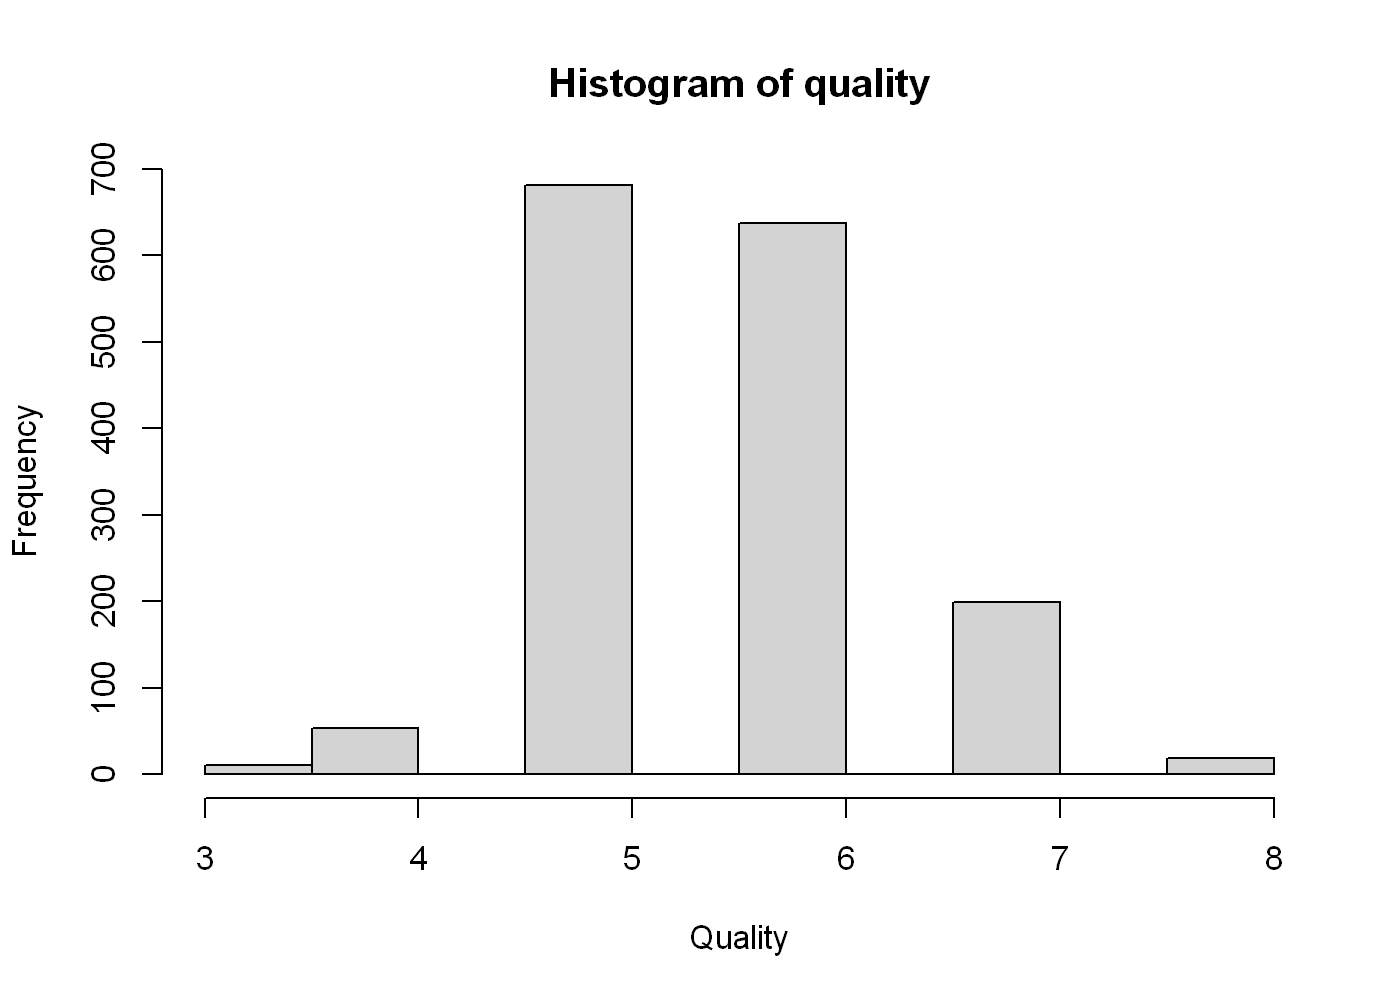

In [11]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
hist(wine_dat$quality, xlab = 'Quality' ,main = 'Histogram of quality')

### 2.1. Phân tích tương quan của các biến

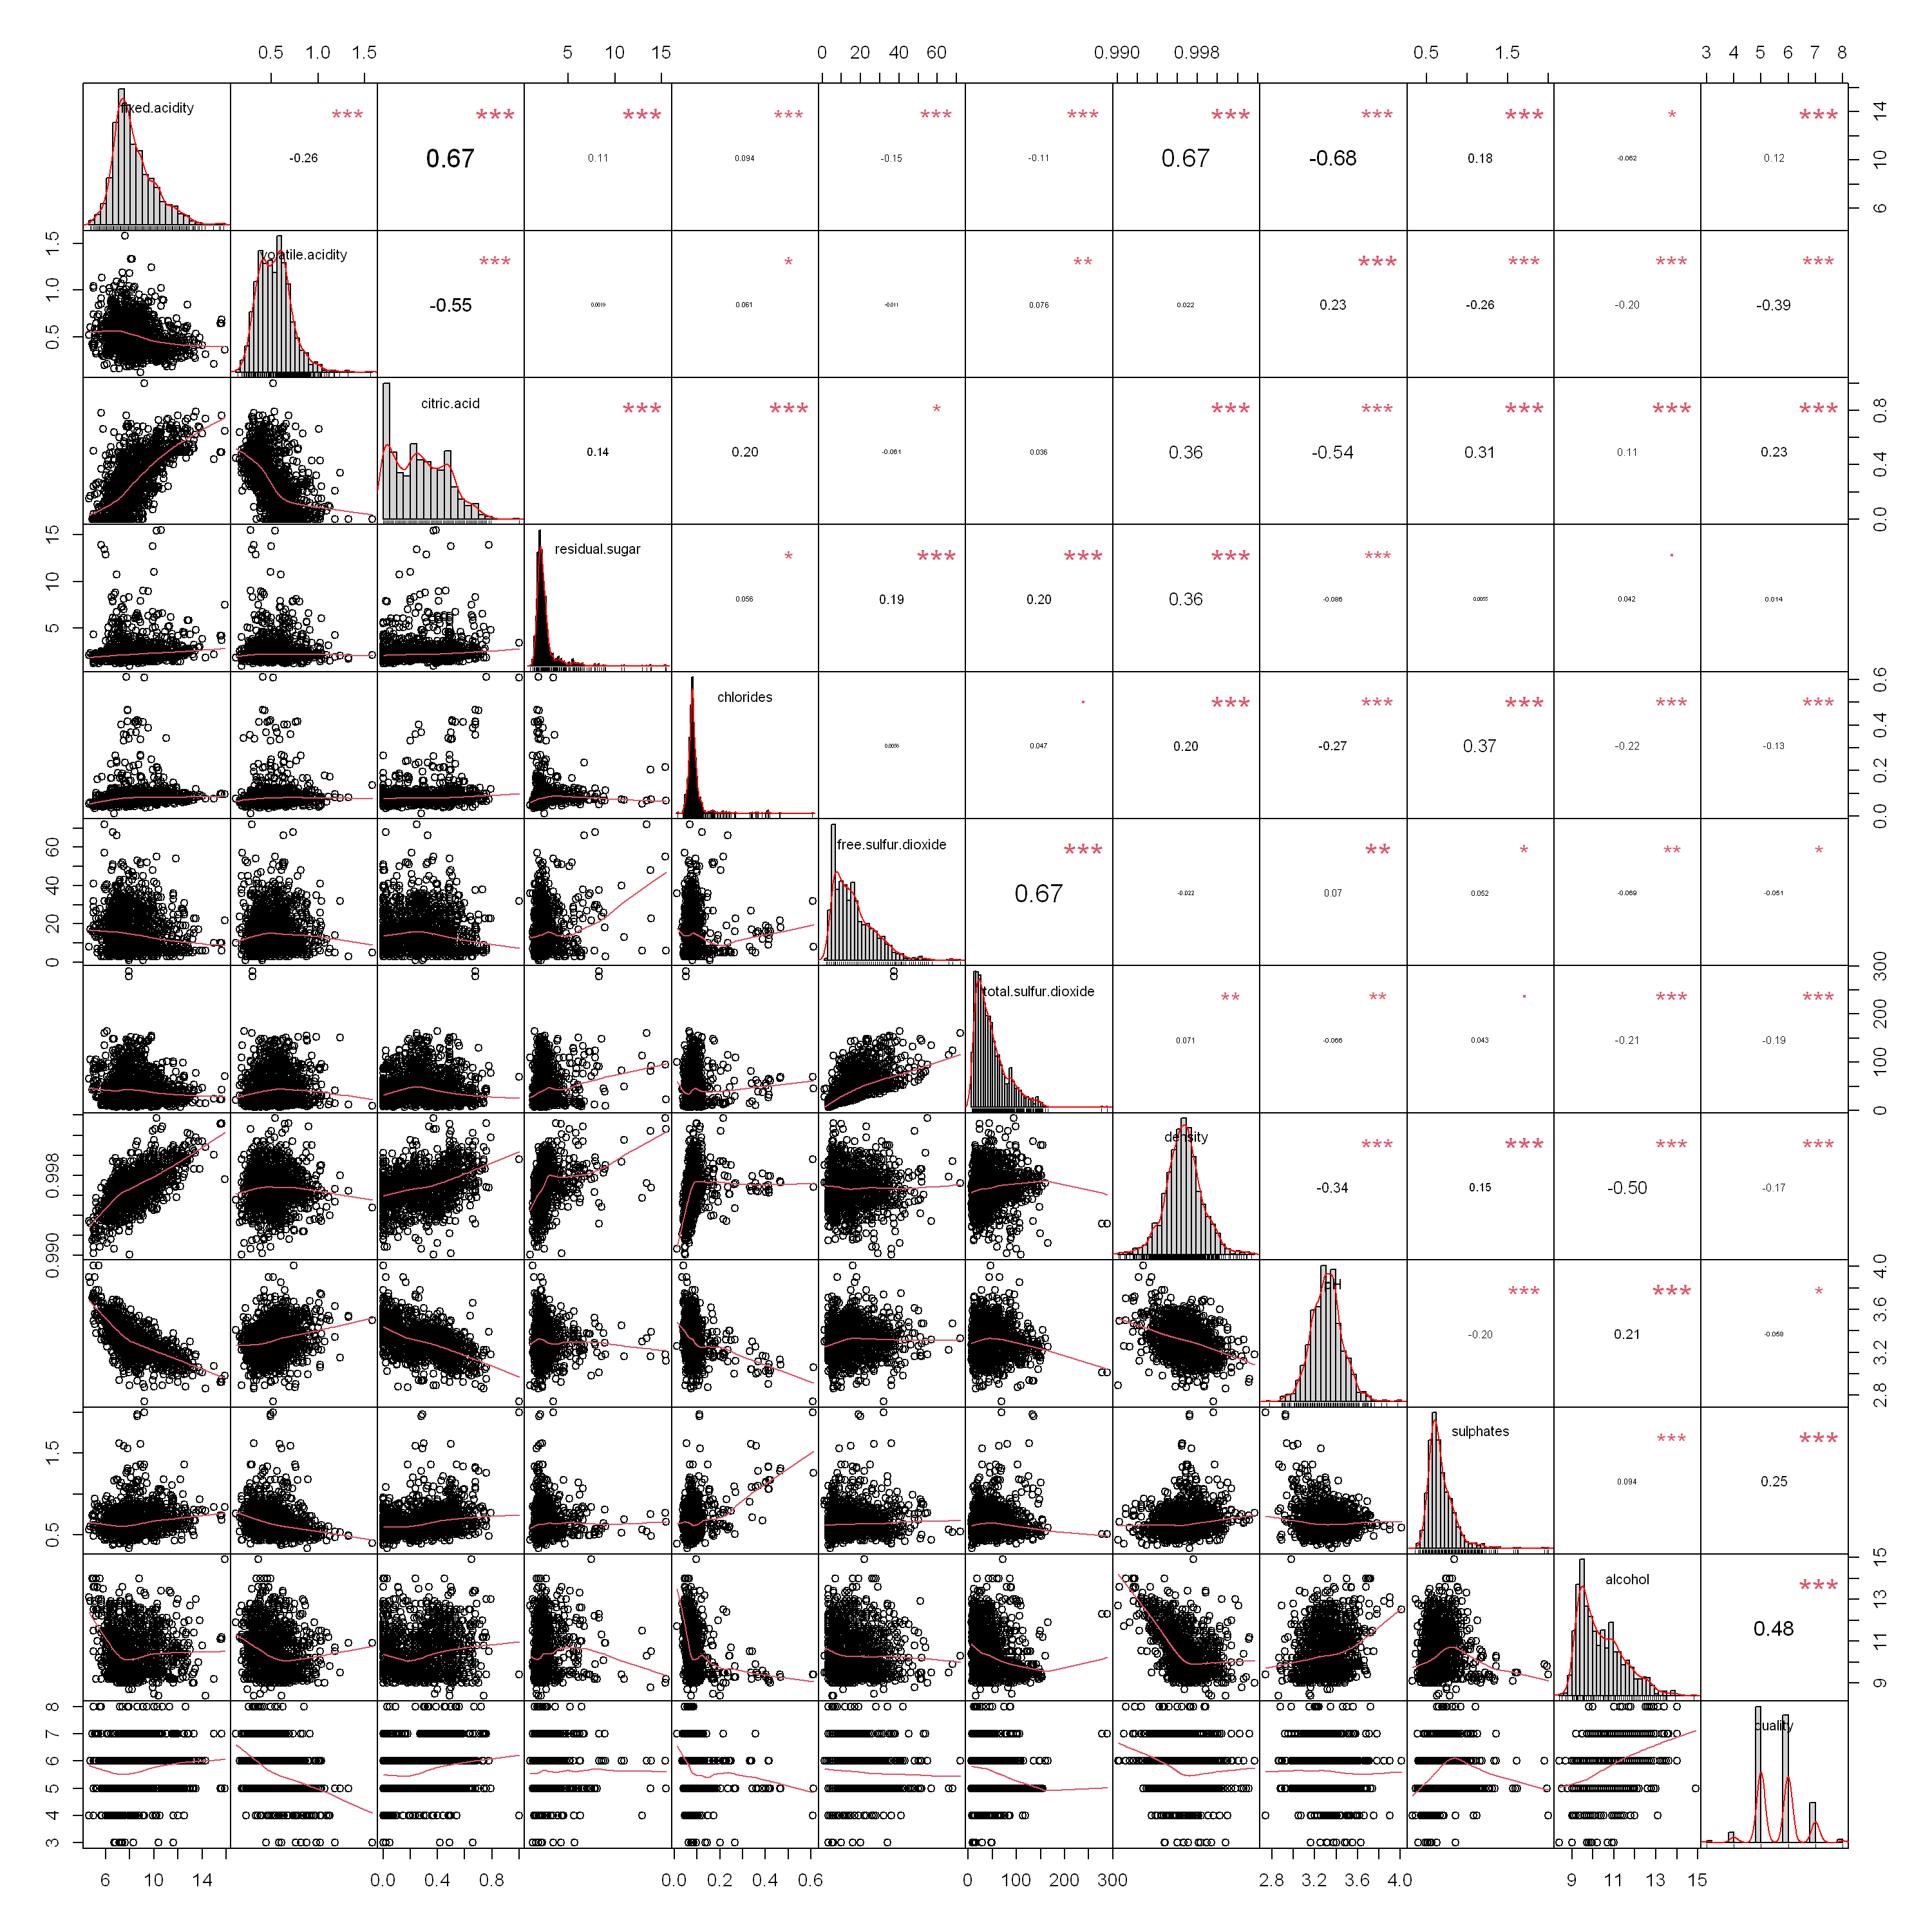

In [15]:
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 250)
chart.Correlation(wine_dat[,1:12],histogram=TRUE,pch="+")

## 3. Phân tích và giải thích

### 3.1. Phân tích PCA

In [19]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 200)
res.pca <- PCA(wine_dat
               ,quanti.sup=12
               # ,quali.sup=13
              ,scale.unit=TRUE
              ,ncp = 10)
round(res.pca$eig,2)

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.10,28.17,28.17
comp 2,1.93,17.51,45.68
comp 3,1.55,14.10,59.78
comp 4,1.21,11.03,70.81
comp 5,0.96,8.72,79.53
comp 6,0.66,6.00,85.52
comp 7,0.58,5.31,90.83
comp 8,0.42,3.85,94.68
comp 9,0.34,3.13,97.81
comp 10,0.18,1.65,99.46


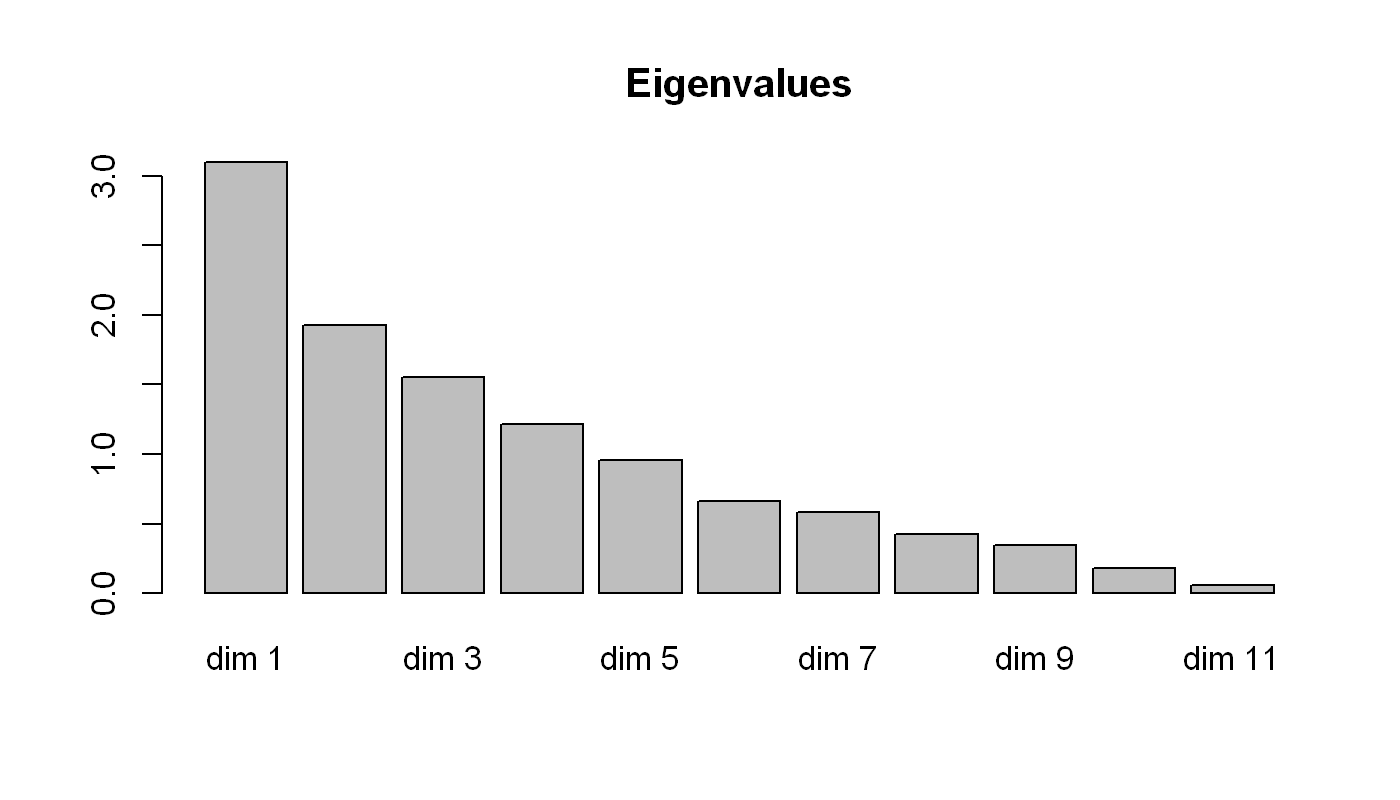

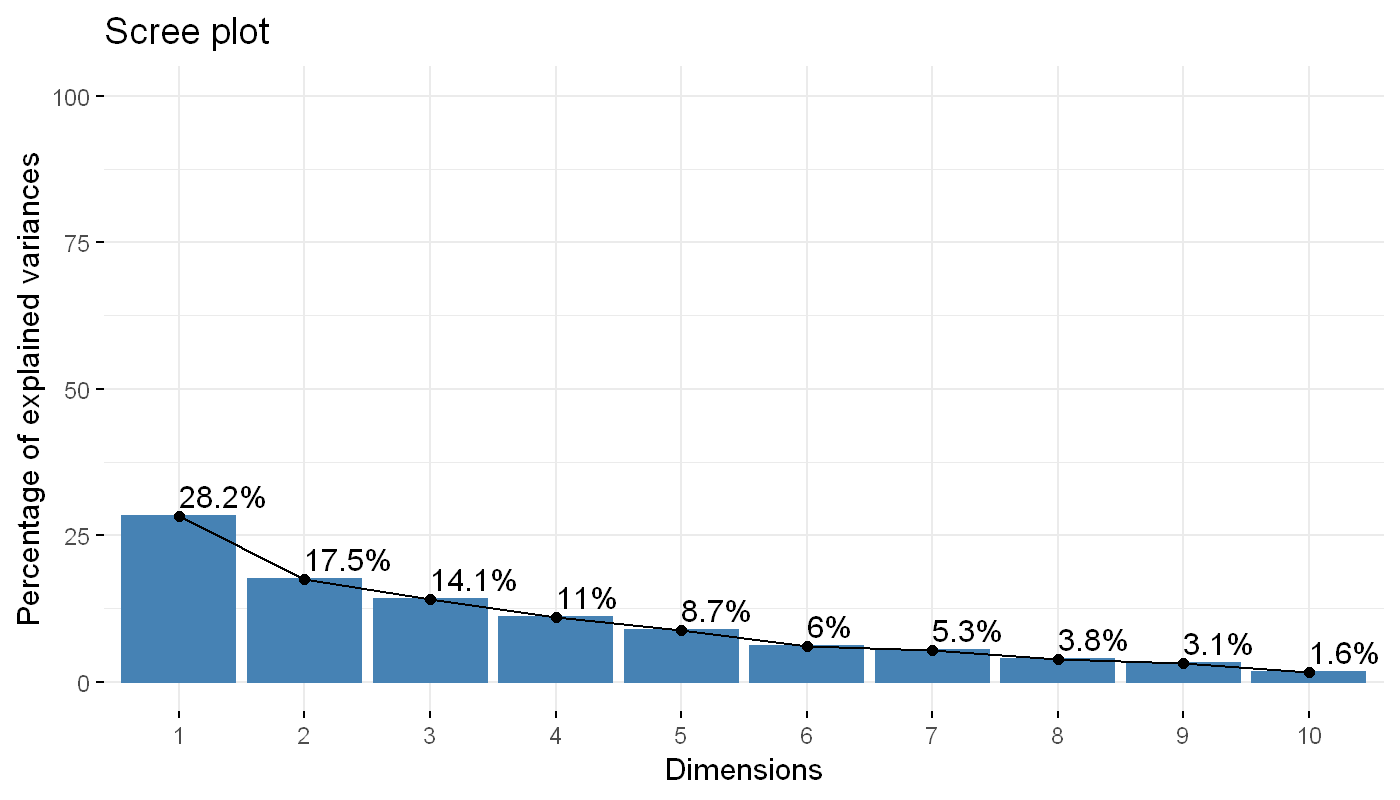

In [39]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
barplot(res.pca$eig[,1],main="Eigenvalues",
names.arg=paste("dim",1:nrow(res.pca$eig)))
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 100)) 

In [21]:
res.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
quality,0.1103493,-0.3868025,0.3992738,-0.04415915,0.1015387,-0.02525645,0.09012557,-0.06929663,-0.1032272,-0.04978644
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
quality,0.1103493,-0.3868025,0.3992738,-0.04415915,0.1015387,-0.02525645,0.09012557,-0.06929663,-0.1032272,-0.04978644
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
quality,0.01217697,0.1496162,0.1594196,0.00195003,0.0103101,0.0006378882,0.008122619,0.004802023,0.01065585,0.002478689


#### Biểu diễn chiều Dim1 và Dim2

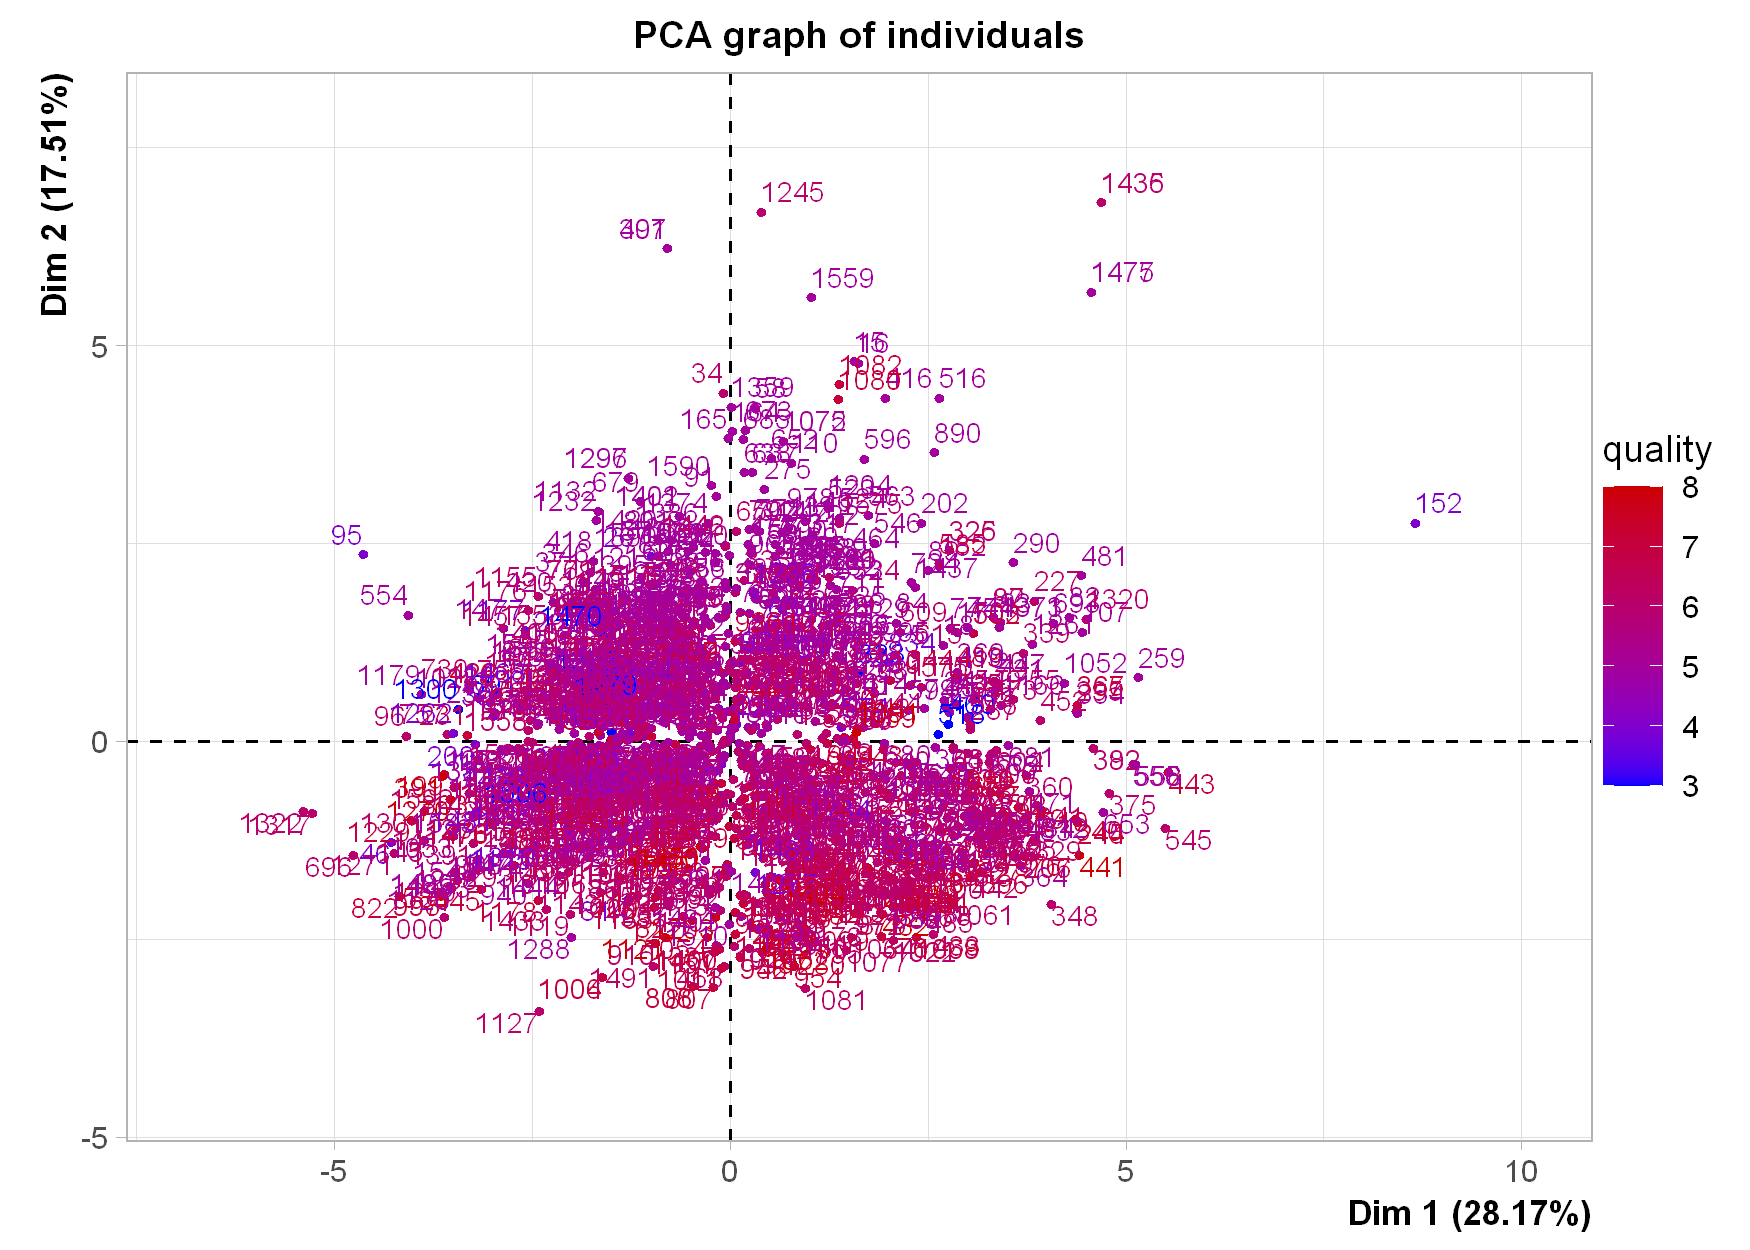

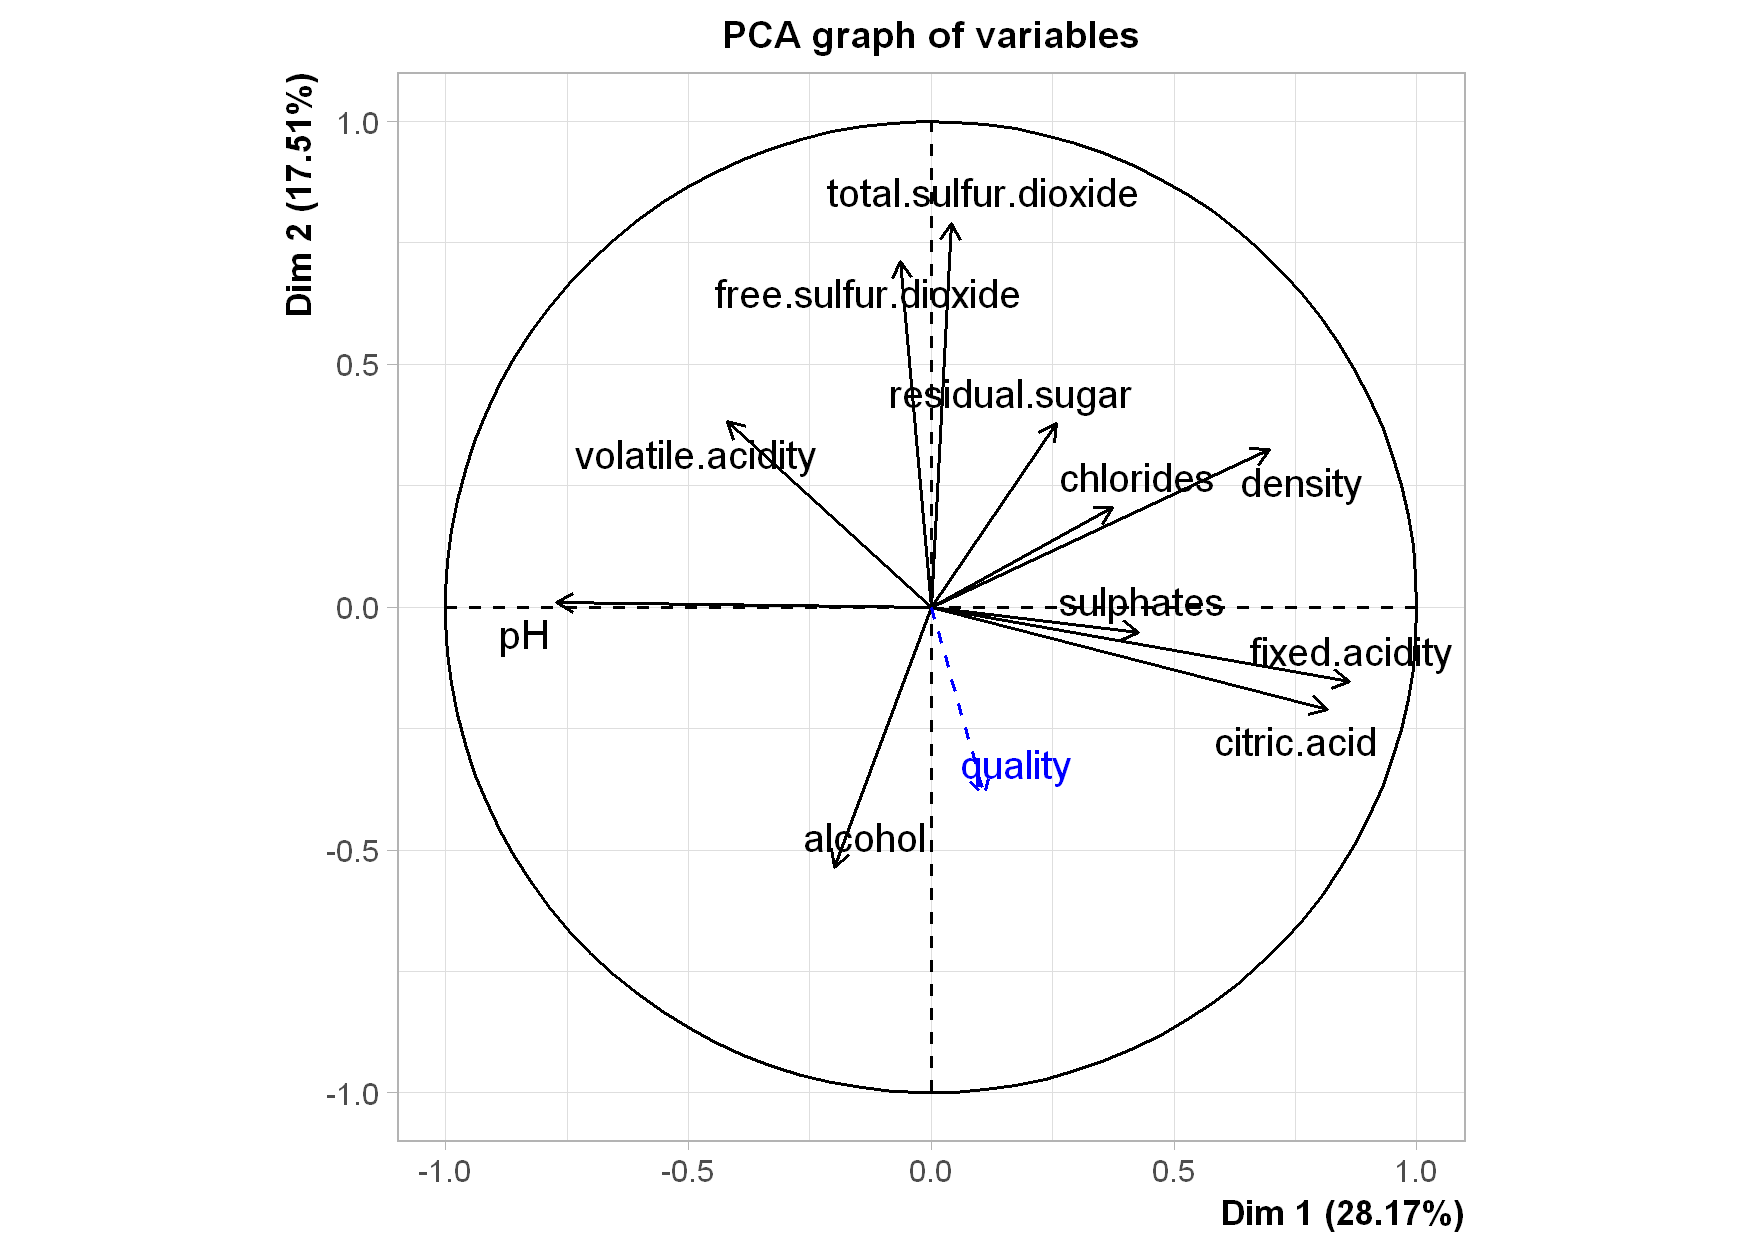

In [24]:
options(repr.plot.width = 7, rep.plot.height = 7, repr.plot.res = 250)
plot(res.pca,choix="ind",habillage=12,cex=0.7)
plot(res.pca,choix="var")

#### Dim3 và Dim4

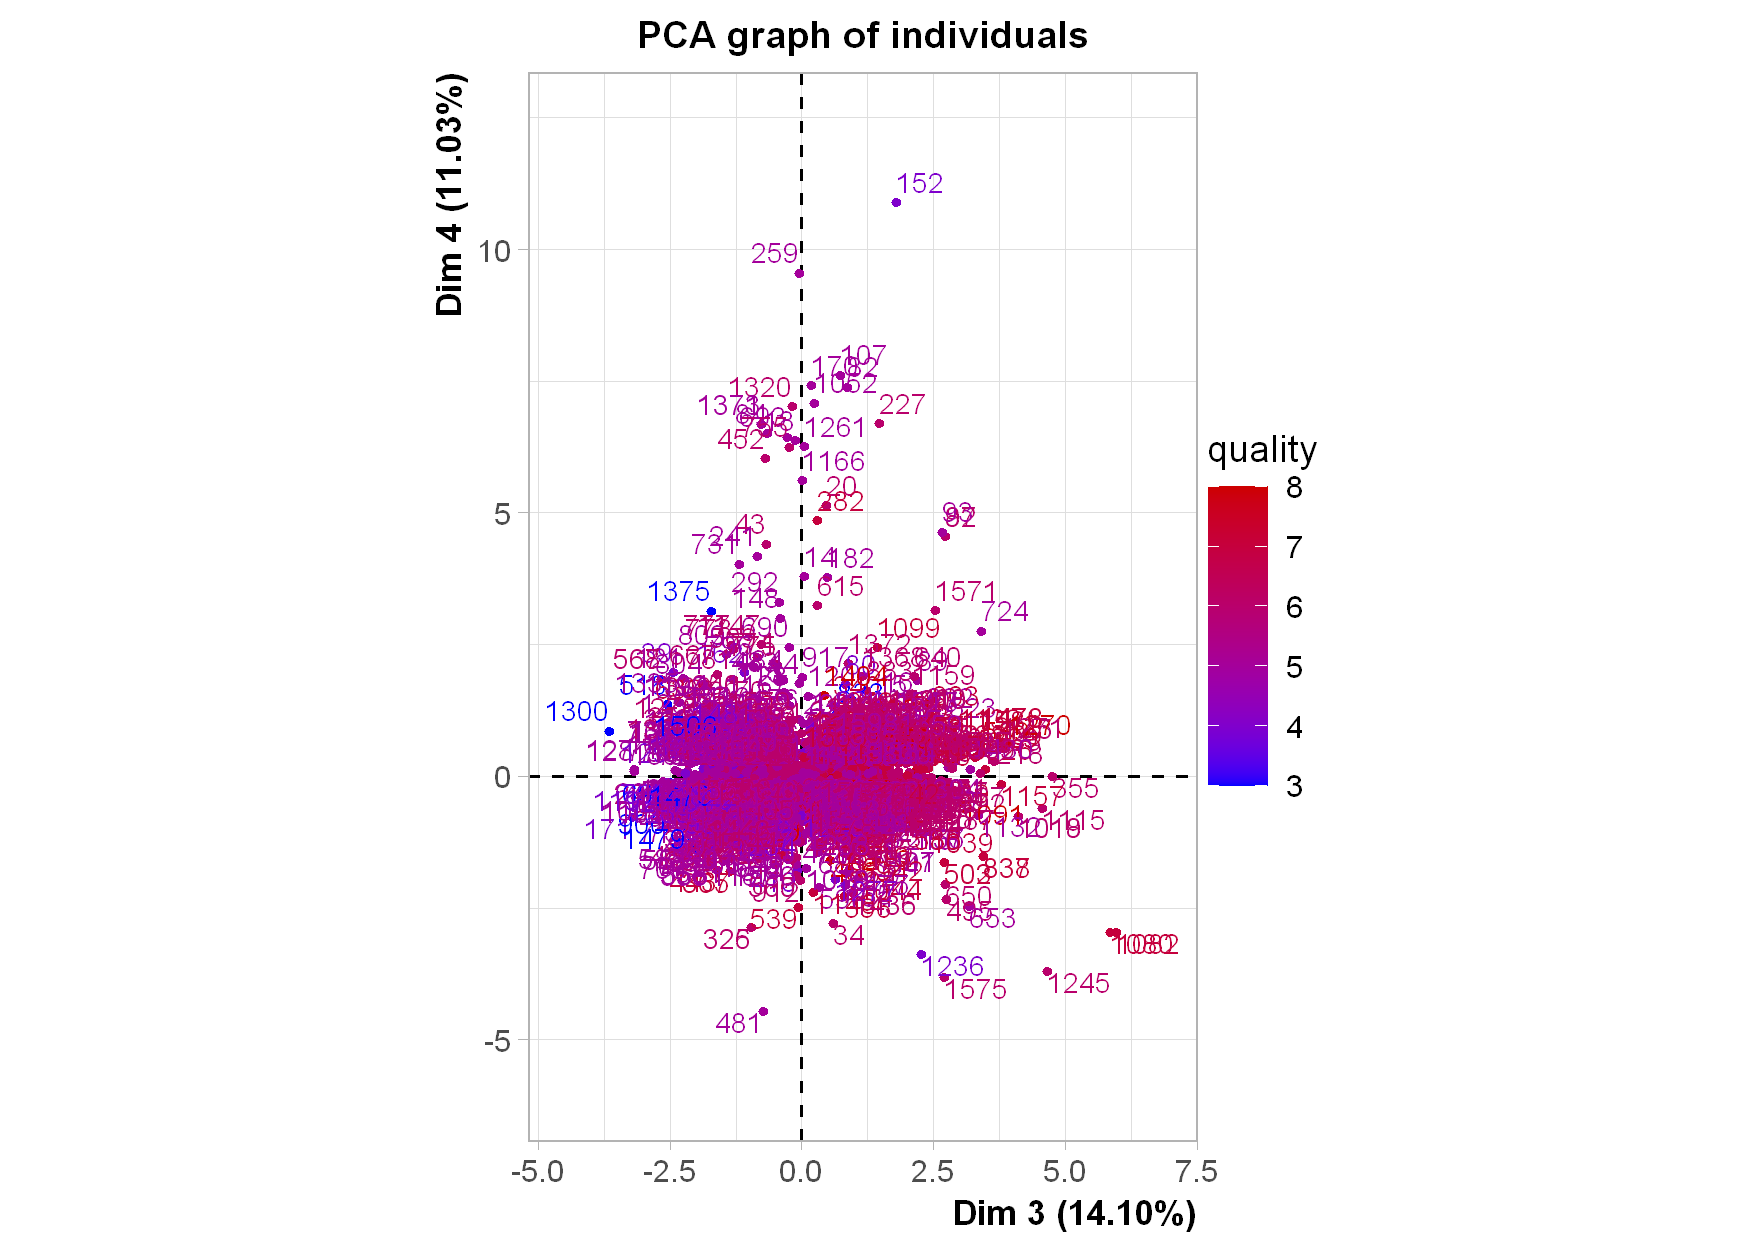

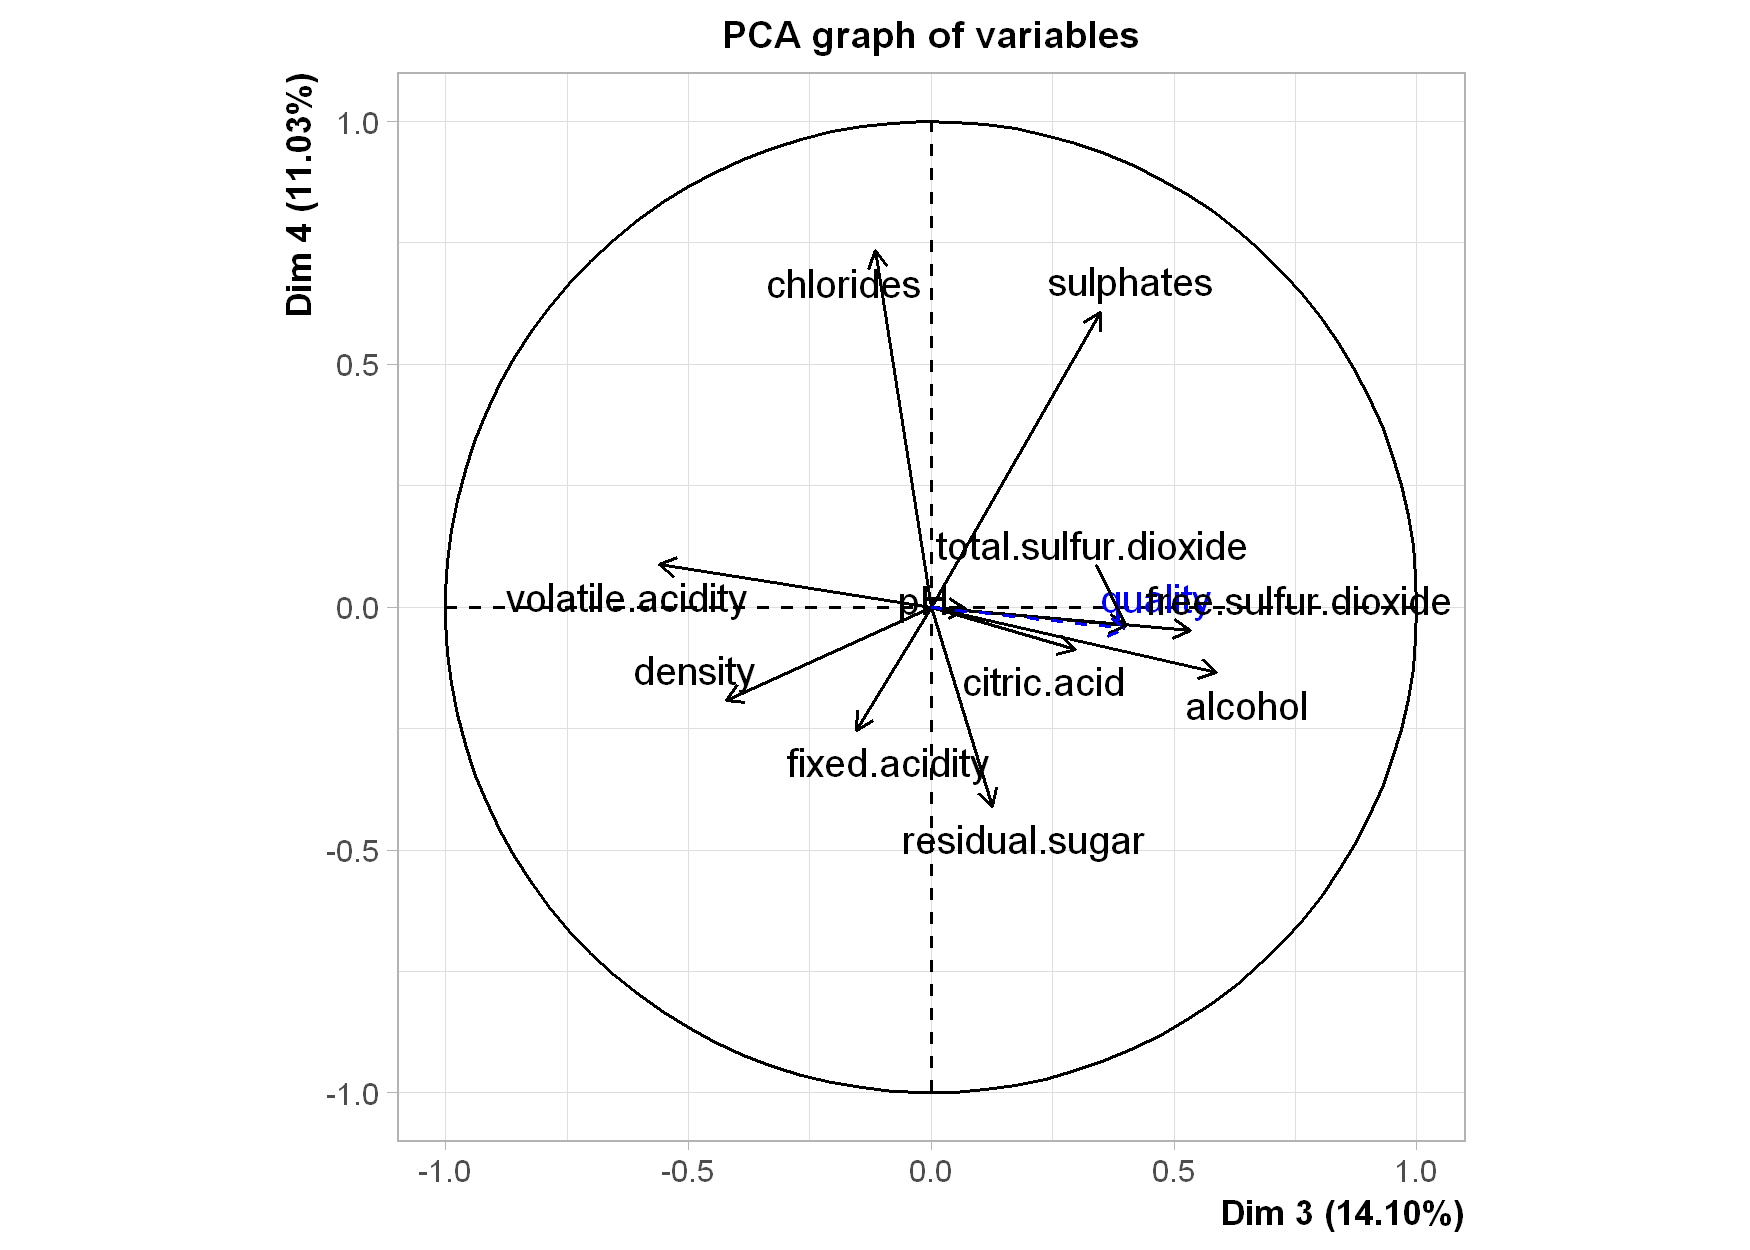

In [25]:
options(repr.plot.width = 7, rep.plot.height = 7, repr.plot.res = 250)
plot(res.pca,choix="ind",habillage=12,cex=0.7,axes=c(3,4))
plot(res.pca,choix="var",axes=c(3,4))

### 3.2. Phân tích KNN để dự đoán chất lượng rượu

In [108]:
pca_wine = data.frame(cbind(res.pca$ind$coord[,1:4],quality=wine_dat$quality))
pca_wine$quality <- as.factor(pca_wine$quality)
head(pca_wine)

,Dim.1,Dim.2,Dim.3,Dim.4,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.6195299,0.4509501,-1.7744541,0.04374031,5
2,-0.7991699,1.8565531,-0.9116902,0.54806597,5
3,-0.7484791,0.8820389,-1.1713942,0.41102067,5
4,2.3576726,-0.2699760,0.2434887,-0.92844998,6
5,-1.6195299,0.4509501,-1.7744541,0.04374031,5
6,-1.5837073,0.5691949,-1.5382861,0.02374989,5


Để việc dự đoán chất lượng rượu được dễ dàng và giải quyết các vấn đề mất cân bằng dữ liệu ta gom chất lượng rượu thành 3 nhóm chính được đánh nhãn:
- *Nhãn 0*: Nhóm chất lượng tốt các loại rượu có quality 7 và 8
- *Nhãn 1*: Nhóm chất lượng trung bình gồm các loại có quality 5 và 6
- *Nhãn 2*: Nhóm chất lượng kém gồm các loại rượu có quality 3 và 4

In [110]:
pca_wine[pca_wine$quality %in% c(3,4),'quality'] = 2
pca_wine[pca_wine$quality %in% c(5,6),'quality'] = 1
pca_wine[pca_wine$quality %in% c(7,8),'quality'] = 0

In [112]:
summary(as.factor(pca_wine$quality))

0    1    2 
 217 1319   63

#### Triết xuất hai tập dữ liệu thành tập huấn luyện và các mẫu thử

In [133]:
set.seed(1)
dat_smpl = sample.split(pca_wine$quality,SplitRat=0.8)
train_dat = data.frame(subset(pca_wine,dat_smpl == T))
test_dat = data.frame(subset(pca_wine,dat_smpl == F))
summary(as.factor(train_dat$quality))
summary(as.factor(test_dat$quality))

0    1    2 
 174 1055   50

0   1   2 
 43 264  13

#### Giải quyết vấn đề mất cân bằng

In [135]:
subdat0 = subset(train_dat,train_dat$quality==0)
subdat1 = subset(train_dat,train_dat$quality==1)
subdat2 = subset(train_dat,train_dat$quality==2)
sub01 = rbind(subdat0,subdat1)
sub12 = rbind(subdat1,subdat2)
# sub02 = rbind(subdat0,subdat2)

#### SMOTE Sampling

In [136]:
require(smotefamily)
n0 = 174
n1 = 1055
n2 = 50
r = 0.5
ntimes01 = ((1-r)/r)*(n1/n0)-1
ntimes12 = ((1-r)/r)*(n1/n2)-1
smote_smpl01 = SMOTE( X = sub01[,-5]
                    , target = sub01$quality
                    , dup_size = ntimes01 )
smote_smpl12 = SMOTE( X = sub12[,-5]
                    , target = sub12$quality
                    , dup_size = ntimes12 )
smote01 = smote_smpl01$data
smote12 = smote_smpl12$data
colnames(smote01)[5] <- 'quality'
colnames(smote12)[5] <- 'quality'
smote_total = rbind(smote01,smote12[smote12$quality!=1,])
smote_total$quality <- as.factor(smote_total$quality)
summary(smote_total$quality)

0    1    2 
1044 1055 1050

In [138]:
require(dplyr)
set.seed(1)
smote_dat = smote_total %>% sample_frac(0.5)
summary(smote_dat$quality)

0   1   2 
539 518 517

3   4   5   6   7   8 
  7  37 477 447 139  13

In [104]:
require(class)

In [159]:
res.knn = knn(
    train=smote_dat,
    test=test_dat,
    cl = smote_dat$quality,
    k=5
)
acc = 100*sum(test_dat$quality==res.knn)/nrow(test_dat)
print(acc)

[1] 95.3125


In [139]:
accList <- array()
for (x in 1:15) {
    res.knn = knn(
    train=smote_dat,
    test=test_dat,
    cl = smote_dat$quality,
    k=x)
    acc = 100*sum(test_dat$quality==res.knn)/nrow(test_dat)
    accList[x] <- acc
}
acc_knn = data.frame(k=1:15,accuracy=accList)

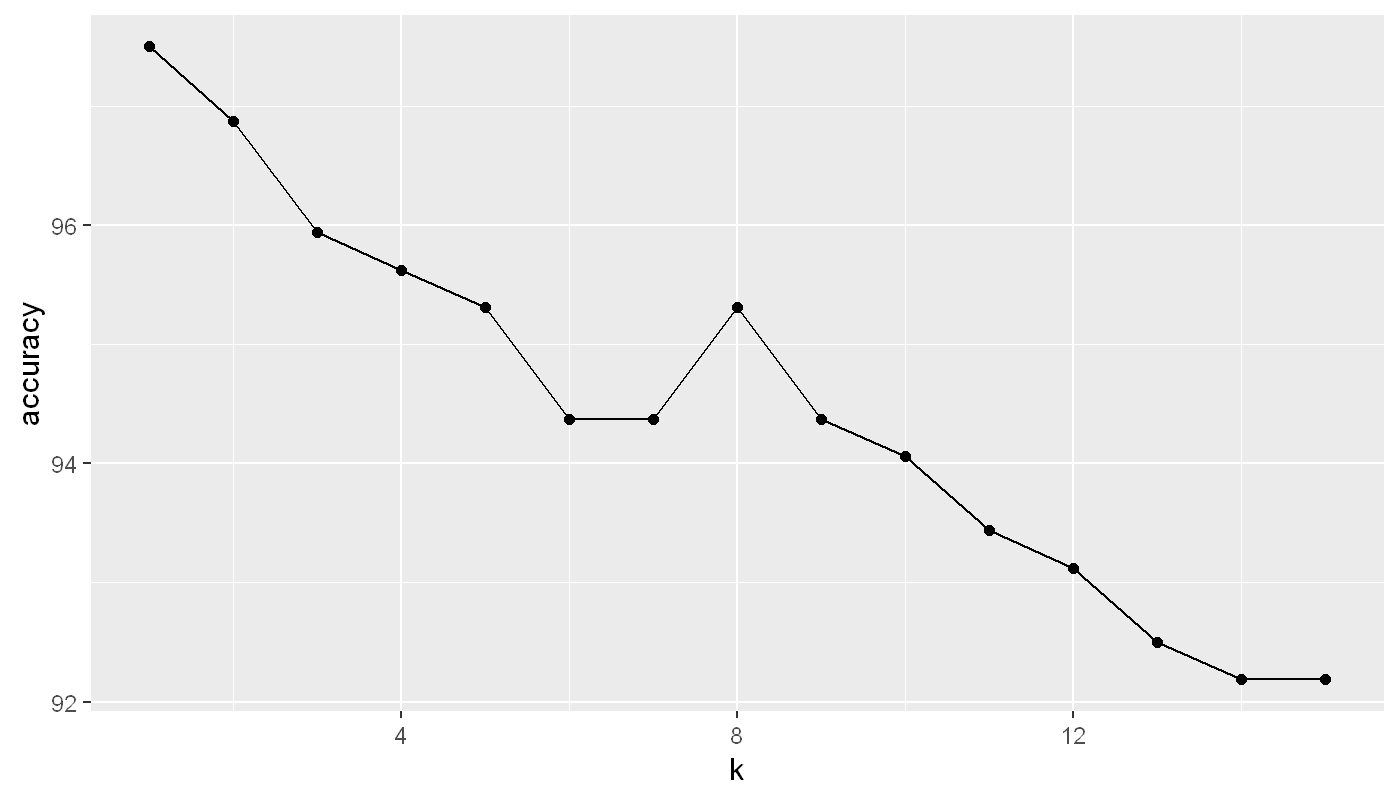

In [140]:
require(ggplot2)
ggplot(data=acc_knn, aes(x=k, y=accuracy)) +
  geom_line()+
  geom_point()

In [170]:
confusionMatrix(table(res.knn,test_dat$quality))

Confusion Matrix and Statistics

       
res.knn   0   1   2
      0  41   9   0
      1   2 252   1
      2   0   3  12

Overall Statistics
                                          
               Accuracy : 0.9531          
                 95% CI : (0.9239, 0.9735)
    No Information Rate : 0.825           
    P-Value [Acc > NIR] : 3.905e-12       
                                          
                  Kappa : 0.8534          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.9535   0.9545  0.92308
Specificity            0.9675   0.9464  0.99023
Pos Pred Value         0.8200   0.9882  0.80000
Neg Pred Value         0.9926   0.8154  0.99672
Prevalence             0.1344   0.8250  0.04063
Detection Rate         0.1281   0.7875  0.03750
Detection Prevalence   0.1562   0.7969  0.04688
Balanced Accuracy      0.9605   0.9505  0.95665

In [168]:
length(test_dat$quality)

[1] 320

In [169]:
length(res.knn)

[1] 320

In [ ]:
length(res.knn)